## Final project - Mariana MacDonald

In this data, which disorder is more frequent, depression or others and how is depression compared to age,married,work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from empiricaldist import Pmf
from empiricaldist import Cdf
import scipy.stats
from scipy.stats import norm
from scipy.stats import f_oneway
import statsmodels.formula.api as smf
import random

import thinkstats2
import thinkplot

In [3]:
#import data
df = pd.read_csv('scores.csv')
df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


## 5 variables in dataset used during  analysis

The 5 variables: gender - 1 or 2 // age // afftype // edu// work 

In [4]:
df.shape

(55, 12)

## Describe what the 5 variables mean in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


"It contains the following columns; number (patient identifier), days (number of days of measurements), gender (1 or 2 for female or male), age (age in age groups), afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), melanch (1: melancholia, 2: no melancholia), inpatient (1: inpatient, 2: outpatient), edu (education grouped in years), marriage (1: married or cohabiting, 2: single), work (1: working or studying, 2: unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped)."

"The underlying data sets provide the motor activity of 23 patients with depression and 32 controls (healthy). The severity of the depression is assessed by experts using the Montgomery-Asberg Depression Rating Scale (MADRS). MADRS levels range from 0 to 60. Values above 30 represent a severe depression, values below 10 indicate a healthy state."

In [6]:
df_cleaned = df.dropna()
df_cleaned

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
10,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
11,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
12,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


In [7]:
df_cleaned[['gender', 'age', 'afftype', 'edu', 'marriage']].head()


,gender,age,afftype,edu,marriage
0,2,35-39,2.0,6-10,1.0
1,2,40-44,1.0,6-10,2.0
2,1,45-49,2.0,6-10,2.0
3,2,25-29,2.0,11-15,1.0
4,2,50-54,2.0,11-15,2.0


## Include a histogram of each of the 5 variables

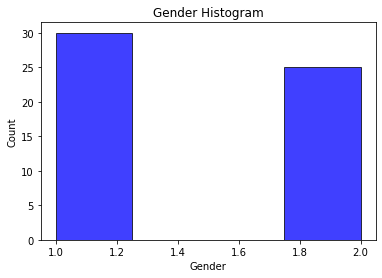

In [8]:
afftype = df["gender"]
n, bins, patches = plt.hist(afftype, 4, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Histogram")
plt.show()

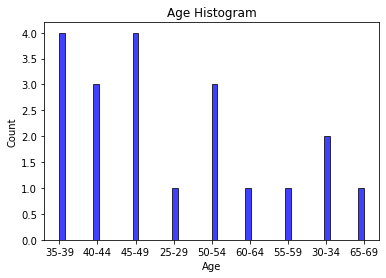

In [9]:
age = df_cleaned["age"]
n, bins, patches = plt.hist(age, 54, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Histogram")
plt.show()

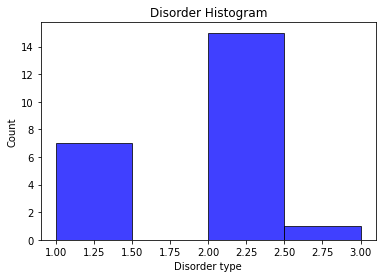

In [10]:
afftype = df["afftype"]
n, bins, patches = plt.hist(afftype, 4, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Disorder type")
plt.ylabel("Count")
plt.title("Disorder Histogram")
plt.show()

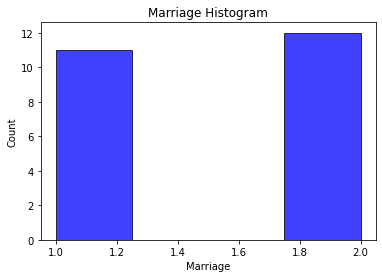

In [11]:
afftype = df["marriage"]
n, bins, patches = plt.hist(afftype, 4, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.title("Marriage Histogram")
plt.show()

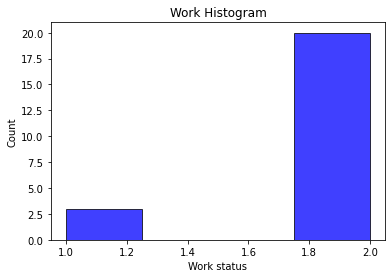

In [12]:
afftype = df["work"]
n, bins, patches = plt.hist(afftype, 4, facecolor = "b", alpha = 0.75, edgecolor = "black")
plt.xlabel("Work status")
plt.ylabel("Count")
plt.title("Work Histogram")
plt.show()

## Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails 

In [13]:
df_cleaned.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,13.10000,1.550000,1.800000,1.950000,1.750000,1.550000,1.900000,22.650000,19.650000
std,2.33734,0.510418,0.523148,0.223607,0.444262,0.510418,0.307794,5.060424,4.659738
min,7.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.00000,1.000000,1.750000,2.000000,1.750000,1.000000,2.000000,18.000000,15.750000
50%,13.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,20.000000
75%,14.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.250000,23.250000
max,18.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


In [14]:
df_cleaned['gender'].describe()

count    20.000000
mean      1.550000
std       0.510418
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: gender, dtype: float64

In [15]:
df_cleaned['age'].describe()

count        20
unique        9
top       35-39
freq          4
Name: age, dtype: object

In [16]:
df_cleaned['afftype'].describe()

count    20.000000
mean      1.800000
std       0.523148
min       1.000000
25%       1.750000
50%       2.000000
75%       2.000000
max       3.000000
Name: afftype, dtype: float64

In [17]:
df_cleaned['edu'].describe()

count       20
unique       4
top       6-10
freq        11
Name: edu, dtype: object

In [18]:
df_cleaned['marriage'].describe()

count    20.000000
mean      1.550000
std       0.510418
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: marriage, dtype: float64

## Compare two scenarios in your data using a PMF.

In [19]:
# get only people with Depression from afftype
depression_filtered = df_cleaned[df_cleaned['afftype'] == 2]
depression_filtered.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0


In [20]:
# Get the unique values
depression_filtered["afftype"].value_counts().sort_index()

2.0    14
Name: afftype, dtype: int64

In [21]:
# Create df for all disorders and only depression compared to age
disorder_others = df_cleaned[df_cleaned.afftype == 2]
print(disorder_others['age'].value_counts().sort_index())

25-29    1
30-34    2
35-39    3
45-49    4
50-54    2
55-59    1
65-69    1
Name: age, dtype: int64


In [22]:
disorder_depression = df_cleaned[df_cleaned.afftype != 2]
print(disorder_depression['age'].value_counts().sort_index())

35-39    1
40-44    3
50-54    1
60-64    1
Name: age, dtype: int64


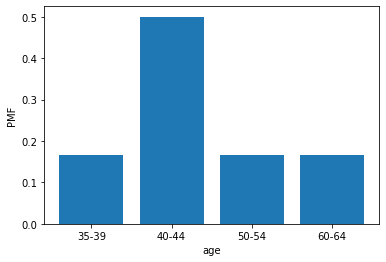

In [23]:
# Plot the PMF levels of depression
disorder_depression_pmf = Pmf.from_seq(disorder_depression['age'])
plt.xlabel("age")
plt.ylabel("PMF")
disorder_depression_pmf.bar()

Mean depression per marital status: 1.8333333333333335
Mean disorders per marital status 1.4285714285714284


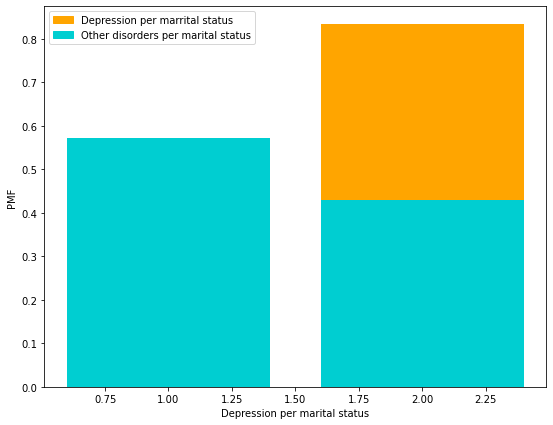

In [24]:
# Compare the PMF of depression versus the other mental disorders
disorder_depression_pmf = Pmf.from_seq(disorder_depression['marriage'])
disorder_others_pmf = Pmf.from_seq(disorder_others['marriage'])

fig, ax = plt.subplots(1, 1, figsize = (9, 7))

depression = mpatches.Patch(color='orange', label='Depression per marrital status')
others = mpatches.Patch(color='darkturquoise', label='Other disorders per marital status')
ax.legend(handles=[depression, others ], )

plt.xlabel("Depression per marital status")
plt.ylabel("PMF")

disorder_depression_pmf.bar(color=['orange'])
disorder_others_pmf.bar(color=['darkturquoise'])


print(f"Mean depression per marital status: {disorder_depression_pmf.mean()}")
print(f"Mean disorders per marital status {disorder_others_pmf.mean()}")

## Create 1 CDF with one of your variables

In [25]:
age_cdf = Cdf.from_seq(depression_filtered['age'])
age_cdf.head()

,probs
25-29,0.071429
30-34,0.214286
35-39,0.428571


The probability of having depression at ages 35-39 are higher than when younger, at a 42% probability.

## Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen.

In [26]:
depression_filtered = df_cleaned[df_cleaned['age'] != 1]
depression_filtered.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


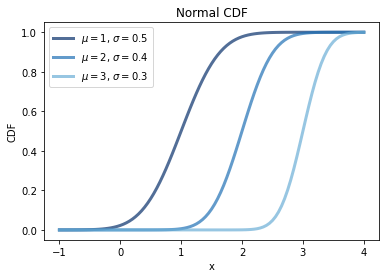

In [27]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r"$\mu=%g$, $\sigma=%g$" % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title="Normal CDF", xlabel="x", ylabel="CDF", loc="upper left")

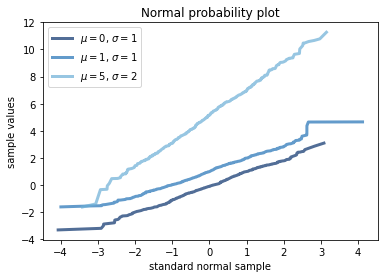

In [28]:
n = 1000
thinkplot.PrePlot(3)

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = "$\mu=%d$, $\sigma=%d$" % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(
    title="Normal probability plot",
    xlabel="standard normal sample",
    ylabel="sample values",
)

## Create two scatter plots comparing two variables and provide your analysis on correlation and causation.

In [29]:
depression_filtered = df_cleaned[df_cleaned['gender'] > 1]
depression_filtered.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


<AxesSubplot:xlabel='afftype', ylabel='gender'>

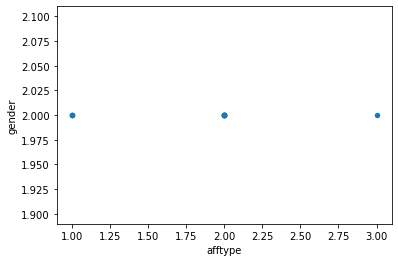

In [30]:
depression_filtered.plot.scatter(x = 'afftype', y = 'gender')

<AxesSubplot:xlabel='afftype', ylabel='work'>

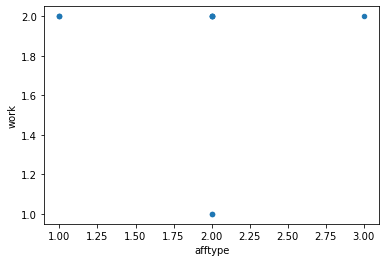

In [31]:
depression_filtered.plot.scatter(x = 'afftype', y = 'work')

## Conduct a test on your hypothesis

In [32]:
disorder_depression['age'].describe()

count         6
unique        4
top       40-44
freq          3
Name: age, dtype: object

In [33]:
disorder_others['age'].describe()

count        14
unique        7
top       45-49
freq          4
Name: age, dtype: object

In [34]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [35]:
class Depressiontest(HypothesisTest):

    def TestStatistic(self, data):
        depression, age = data
        test_stat = abs(depression - age)
        return test_stat

    def RunModel(self):
        depression, age = self.data
        n = depression + age
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data

In [36]:
ct = Depressiontest((140, 110))
pvalue = ct.PValue()
pvalue

0.062

## Conduct a regression analysis

In [37]:
disorder_age = smf.ols('afftype ~ age', data = df_cleaned).fit()
disorder_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                afftype   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                 -0.356
Method:                 Least Squares   F-statistic:                    0.3760
Date:                Wed, 10 Aug 2022   Prob (F-statistic):              0.912
Time:                        17:27:24   Log-Likelihood:                -12.491
No. Observations:                  20   AIC:                             42.98
Df Residuals:                      11   BIC:                             51.94
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0000      0.609      3.283      0.007       0.659       3.341
age[T.30-34] -4.441e-16      0.746  -5.95e-16      1.000      -1.642       1.642
age[T.35-39]    -0.2500      0.681     -0.367      0.721      -1.749       1.249
age[T.40-44]    -0.3333      0.704     -0.474      0.645      -1.882       1.215
age[T.45-49] -4.441e-16      0.681  -6.52e-16      1.000      -1.499       1.499
age[T.50-54]    -0.3333      0.704     -0.474      0.645      -1.882       1.215
age[T.55-59] -5.892e-16      0.862  -6.84e-16      1.000      -1.896       1.896
age[T.60-64]    -1.0000      0.862     -1.161      0.270      -2.896       0.896
age[T.65-69] -4.479e-16      0.862   -5.2e-16      1.000      -1.896       1.896
==============================================================================
Omnibus:                        6.461   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.453
Skew:                           0.640   Prob(JB):                        0.108
Kurtosis:                       4.925   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
results_disorders = smf.ols('afftype ~ gender', 
                  data = df_cleaned).fit()
results_disorders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                afftype   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.054
Method:                 Least Squares   F-statistic:                   0.02802
Date:                Wed, 10 Aug 2022   Prob (F-statistic):              0.869
Time:                        17:27:25   Log-Likelihood:                -14.892
No. Observations:                  20   AIC:                             33.78
Df Residuals:                      18   BIC:                             35.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7374      0.393      4.421      0.000       0.912       2.563
gender         0.0404      0.241      0.167      0.869      -0.467       0.548
==============================================================================
Omnibus:                        0.848   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.316
Skew:                          -0.308   Prob(JB):                        0.854
Kurtosis:                       3.006   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

References


https://www.kaggle.com/datasets/arashnic/the-depression-dataset
https://www.kaggle.com/code/docxian/depression-and-motor-activity/notebook
